## Chapter 1.8: Onlap relationships
***
In some geologic cases we want to represent an onlap relationship, where layers deposited onto an erosive surface. This is also useful to model subduction zones as layers onlap the dipping plate. While surfaces in GemPy normally define the bottom of a unit, onlap surfaces represent the top surface, directly followed by other units.

Let's start as always by importing the necessary dependencies:

In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../..")
#sys.path.insert(0, '/home/miguel/anaconda3/lib/python3.6/site-packages/scikit_image-0.15.dev0-py3.6-linux-x86_64.egg/')
import skimage
# Importing gempy
import gempy as gp
import matplotlib.pyplot as plt
# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib
import theano
import qgrid

#%matplotlib widget

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
skimage.__version__

'0.15.dev0'

We import a model from an existing folder, representing a subduction zone with onlap relationships.
The theano function is automatically recombiled to allow changes.

In [3]:
geo_model = gp.load_model('Tutorial_ch1-8_Onlap_relations', recompile=False)

In [4]:
geo_model.surfaces.df

,surface,series,order_surfaces,isBasement,color,vertices,edges,id
0,seafloor,seafloor_series,1,False,#015482,NaN,NaN,1
1,rock1,right_series,1,False,#728f02,NaN,NaN,2
2,rock2,right_series,2,False,#443988,NaN,NaN,3
5,onlap_surface,onlap_series,1,False,#ffbe00,NaN,NaN,4
3,rock3,left_series,1,False,#9f0052,NaN,NaN,5
4,basement,basement,1,True,#ff3f20,NaN,NaN,6


In [5]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            5
          number series                              4
          number surfaces per series      [1, 2, 1, 1]
          len surfaces surface_points  [6, 4, 4, 6, 6]
          len series surface_points       [6, 8, 6, 6]
          len series orientations         [3, 4, 3, 3]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1854.72
          $C_o$                                81904.8
          drift equations                          [3]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [6]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,seafloor,seafloor_series,1,False,#015482,1
1,rock1,right_series,1,False,#728f02,2
2,rock2,right_series,2,False,#443988,3
5,onlap_surface,onlap_series,1,False,#ffbe00,4
3,rock3,left_series,1,False,#9f0052,5
4,basement,basement,1,True,#ff3f20,6


In [10]:
geo_model.additional_data

values
Structure isLith                                  True
          isFault                                False
          number faults                              0
          number surfaces                            5
          number series                              4
          number surfaces per series      [1, 2, 1, 1]
          len surfaces surface_points  [6, 4, 4, 6, 6]
          len series surface_points       [6, 8, 6, 6]
          len series orientations         [3, 4, 3, 3]
Options   dtype                                float64
          output                               geology
          theano_optimizer                fast_compile
          device                                   cpu
          verbosity                                 []
Kriging   range                                1854.72
          $C_o$                                81904.8
          drift equations                 [3, 3, 3, 3]
          nugget grad                             0.01
          nugget scalar                          1e-06
Rescaling rescaling factor                         NaN
          centers                      [nan, nan, nan]

In [13]:
gp.activate_interactive_df(geo_model)

In [14]:
#geo_model.qi.get('orientations')

In [15]:
geo_model.qi.get('surfaces')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [16]:
geo_model.qi.get('series')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [17]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [18]:
geo_model.qi.get('surface_points')

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

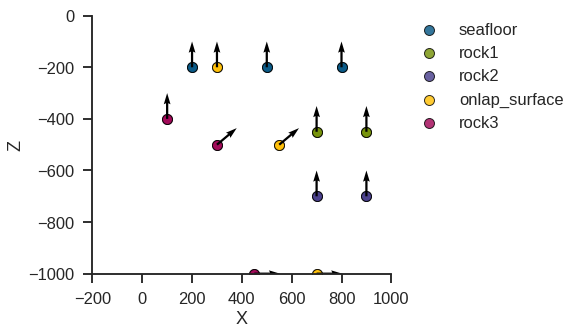

In [19]:
gp.plot.plot_data(geo_model, direction='y')

In [20]:
gp.set_interpolation_data(geo_model, verbose=[])

Compiling theano function...
Compilation Done!


,values
dtype,float64
output,geology
theano_optimizer,fast_compile
device,cpu
verbosity,[]


In [21]:
geo_model.set_regular_grid([-200,1000,-500,500,-1000,0], [50,50,50])

Grid Object. Values: 
array([[-188., -490., -990.],
       [-188., -490., -970.],
       [-188., -490., -950.],
       ...,
       [ 988.,  490.,  -50.],
       [ 988.,  490.,  -30.],
       [ 988.,  490.,  -10.]])

In [22]:
#geo_model.update_to_interpolator()

In [23]:
#geo_model.surface_points.sort_table()

In [24]:
gp.compute_model(geo_model, compute_mesh=True)

../../gempy/core/solution.py:92: UserWarning: It is not possible to compute the mesh.
  warnings.warn('It is not possible to compute the mesh.')



Lithology ids 
  [6. 6. 6. ... 1. 1. 1.] 

{'cmap': <matplotlib.colors.ListedColormap object at 0x7fab2d184d30>, 'norm': <matplotlib.colors.Normalize object at 0x7fab2d184ef0>}


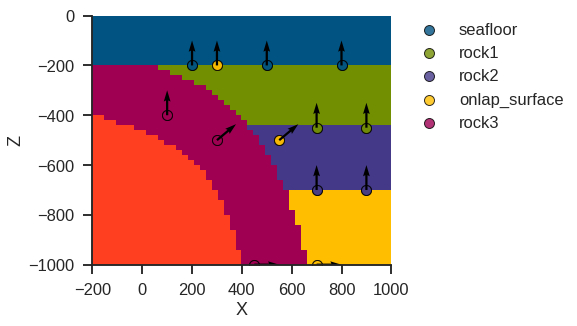

In [25]:
gp.plot.plot_section(geo_model, 2, plot_data=True)

False
{'cmap': <matplotlib.colors.ListedColormap object at 0x7fab2d017588>, 'norm': <matplotlib.colors.Normalize object at 0x7fab2d017c18>}


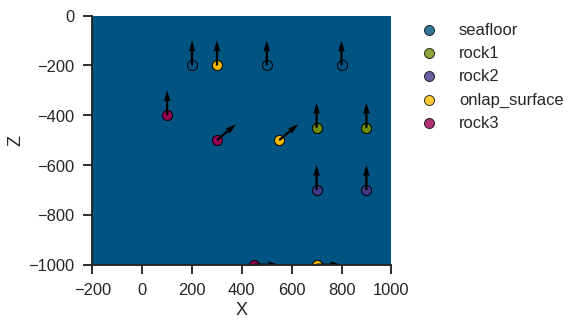

In [26]:
gp.plot.plot_section(geo_model, 2, block=geo_model.solutions.mask_matrix_pad[0].T, plot_data=True,
                    )

In [27]:
geo_model.series

,order_series,BottomRelation
seafloor_series,1,Erosion
right_series,2,Onlap
onlap_series,3,Erosion
left_series,4,Erosion
basement,5,Erosion


In [28]:
geo_model.solutions.mask_matrix.dtype == bool

True

In [31]:
geo_model.solutions.vertices

[array([[-200., -500., -210.],
        [-200., -480., -210.],
        [-176., -500., -210.],
        ...,
        [ 976.,  440., -210.],
        [ 976.,  460., -210.],
        [ 976.,  480., -210.]])]

In [29]:
gp.plot.plot_3D(geo_model)

closing vtk


Save model if any changes were made:

In [30]:
#geo_model.save_model('Tutorial_ch1-8_Onlap_relations')